In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Importing Basic Library For ELT

In [2]:
url = "/content/1960_onwards.csv"
pipe_original = pd.read_csv(url)
data = pipe_original.copy()
data

,Year,Consumer price index (2010 = 100),GDP (constant LCU),GDP (current LCU),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)",Livestock production index (2014-2016 = 100),...,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves,GDPBillions of US $,Per CapitaUS $,Growth RateAnnual % Change,Petrol Price (Naira),Food imports (% of merchandise imports),Food exports (% of merchandise imports)
0,1960,0.065886,9.277980e+12,2.997269e+09,0.191795,93.397048,-1.834010,6.257169,5.444327,17.19,...,4.49,272.40,2447132.17,258214.99,4.196175,93.3970,0.0000,0.05,14.129951,64.523594
1,1961,0.070023,9.295770e+12,3.190921e+09,0.191795,97.420968,-1.834010,6.257169,6.279147,17.19,...,-14.56,292.83,2447132.17,258214.99,4.467288,97.4210,0.1918,0.05,14.129951,64.523594
2,1962,0.073710,9.677180e+12,3.506715e+09,4.102993,104.852749,1.954451,5.565301,5.265632,15.71,...,-17.91,325.43,2447132.17,258214.99,4.909399,104.8527,4.1030,0.05,14.129951,64.523594
3,1963,0.071724,1.050730e+13,3.689709e+09,8.578619,108.015742,6.306528,-3.094752,-2.694655,15.95,...,-9.20,361.82,2447132.17,258214.99,5.165590,108.0157,8.5786,0.05,12.139264,62.312145
4,1964,0.072338,1.102750e+13,3.966381e+09,4.950489,113.658375,2.729816,2.427809,0.856793,17.60,...,-0.49,430.49,2447132.17,258214.99,5.552931,113.6584,4.9505,0.05,9.237443,61.003786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,302.939394,7.080050e+13,1.542520e+14,-1.794253,2074.613747,-4.162059,7.849142,13.246023,111.48,...,3998185.81,33314521.33,2723489.03,317234.17,432.198898,2074.6137,-1.7943,1.65,14.626081,2.982721
61,2021,354.296242,7.338280e+13,1.760760e+14,3.647187,2065.774410,1.182828,10.131034,16.952846,111.54,...,4678119.71,39955126.37,415285.94,340377.25,440.838992,2065.7744,3.6472,1.68,14.164497,3.280086
62,2022,421.071120,7.576890e+13,2.023650e+14,3.251681,2162.633734,0.823296,11.311335,18.847188,112.91,...,6882611.86,48421940.59,42475.94,375808.20,472.624597,2162.6337,3.2517,1.95,11.425529,2.753877
63,2023,421.071120,7.576890e+13,2.023650e+14,3.251681,2162.633734,0.823296,11.311335,18.847188,112.91,...,9934871.45,62955753.61,490843.62,340630.66,472.624597,2162.6337,3.2517,6.26,14.716258,12.638645


In [3]:
data.isna().sum()

Year                                                        0
Consumer price index (2010 = 100)                           0
GDP (constant LCU)                                          0
GDP (current LCU)                                           0
GDP growth (annual %)                                       0
GDP per capita (current US$)                                0
GDP per capita growth (annual %)                            0
Inflation, GDP deflator (annual %)                          0
Inflation, consumer prices (annual %)                       0
Livestock production index (2014-2016 = 100)                0
Official exchange rate (LCU per US$, period average)        0
Total reserves (includes gold, current US$)                 0
Population, total                                           0
Population, female                                          0
Population, male                                            0
Population ages 0-14 (% of total population)                0
Populati

In [4]:
data.columns


Index(['Year', 'Consumer price index (2010 = 100)', 'GDP (constant LCU)',
       'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Inflation, consumer prices (annual %)',
       'Livestock production index (2014-2016 = 100)',
       'Official exchange rate (LCU per US$, period average)',
       'Total reserves (includes gold, current US$)', 'Population, total',
       'Population, female', 'Population, male',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Population ages 65 and above (% of total population)',
       'Trade Openness Index(%)', 'Crude oil price(per barrel in $)',
       'Cumulative crude oil production up to and including year',
       'Narrow Money', 'Money Supply M3', 'Net Foreign Assets',
       'Net Domestic Credit', 'Credit to Government',
       'Credit to Private Sector',

In [5]:
for col in data.columns:
  rv = np.ptp(data[col])
  print(rv)

64
421.005234336
66554350000000.0
202362002731300.0
40.75087014
3107.55575128
39.78890873
222.09759645
76.561839065
97.19999999999999
425.432377208
53485734357.0
173612870
85583521
88029349
4.0225218
3.8835148000000004
0.3996370739999997
44.14211
108.24000000000001
35306095
32035290.01
83831185.49
25415115.39
99620218.7
29530703.05
75367595.17
23291700.63
3783933.74
19507767.63
3481242.96
28554047.07
62223598.83
71424898.35
23527427.37
94258888.83999999
7130292.2299999995
433229.15
569.987588898
3107.5558
40.7508
69.95
22.466936310999998
64.50793568499999


In [6]:
df = data.copy()

<Axes: >

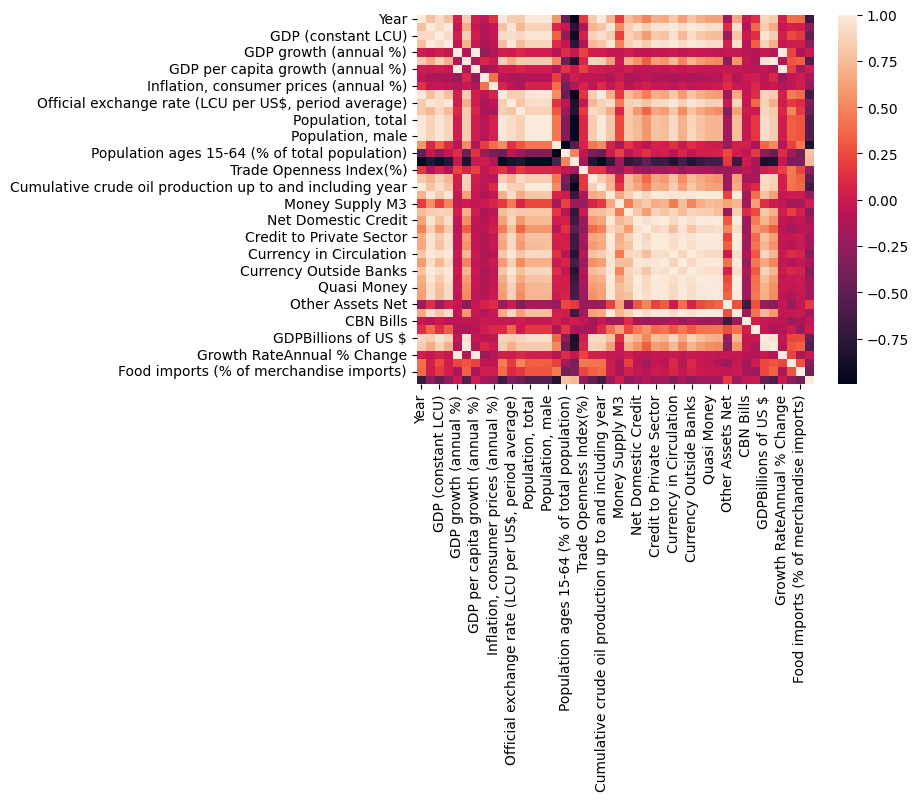

In [7]:
## Visualizing Correlation on heatmap
sns.heatmap(df.corr(), annot=False)

In [8]:
## Check for multicollinearity
## Function For finding feature having correlation higher than threshold
def corrr(df , thresh):
    c_c = set()
    data = df.corr()
    for i in range(len(data.columns)):
        for j in range(i):
            if abs(data.iloc[i,j]) > thresh:
                col_name = data.columns[i]
                c_c.add(col_name)
    return c_c


In [9]:
corrr(df,.95)

{'Bank Reserves',
 'Base Money',
 'Credit to Private Sector',
 'Cumulative crude oil production up to and including year',
 'Currency Outside Banks',
 'Currency in Circulation',
 'Demand Deposits',
 'GDP (current LCU)',
 'GDP per capita growth (annual %)',
 'GDPBillions of US $',
 'Growth RateAnnual % Change',
 'Livestock production index (2014-2016 = 100)',
 'Money Supply M2',
 'Narrow Money',
 'Net Domestic Assets',
 'Net Domestic Credit',
 'Official exchange rate (LCU per US$, period average)',
 'Per CapitaUS $',
 'Population ages 15-64 (% of total population)',
 'Population ages 65 and above (% of total population)',
 'Population, female',
 'Population, male',
 'Population, total',
 'Quasi Money'}

In [10]:
# Dropping features with more than 85% corelation
X = df.drop(labels='GDP per capita (current US$)', axis=1)
y= df.drop(df.columns.difference(['GDP per capita (current US$)']) , axis=1)

In [11]:
X

,Year,Consumer price index (2010 = 100),GDP (constant LCU),GDP (current LCU),GDP growth (annual %),GDP per capita growth (annual %),"Inflation, GDP deflator (annual %)","Inflation, consumer prices (annual %)",Livestock production index (2014-2016 = 100),"Official exchange rate (LCU per US$, period average)",...,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves,GDPBillions of US $,Per CapitaUS $,Growth RateAnnual % Change,Petrol Price (Naira),Food imports (% of merchandise imports),Food exports (% of merchandise imports)
0,1960,0.065886,9.277980e+12,2.997269e+09,0.191795,-1.834010,6.257169,5.444327,17.19,0.714286,...,4.49,272.40,2447132.17,258214.99,4.196175,93.3970,0.0000,0.05,14.129951,64.523594
1,1961,0.070023,9.295770e+12,3.190921e+09,0.191795,-1.834010,6.257169,6.279147,17.19,0.714286,...,-14.56,292.83,2447132.17,258214.99,4.467288,97.4210,0.1918,0.05,14.129951,64.523594
2,1962,0.073710,9.677180e+12,3.506715e+09,4.102993,1.954451,5.565301,5.265632,15.71,0.714286,...,-17.91,325.43,2447132.17,258214.99,4.909399,104.8527,4.1030,0.05,14.129951,64.523594
3,1963,0.071724,1.050730e+13,3.689709e+09,8.578619,6.306528,-3.094752,-2.694655,15.95,0.714286,...,-9.20,361.82,2447132.17,258214.99,5.165590,108.0157,8.5786,0.05,12.139264,62.312145
4,1964,0.072338,1.102750e+13,3.966381e+09,4.950489,2.729816,2.427809,0.856793,17.60,0.714286,...,-0.49,430.49,2447132.17,258214.99,5.552931,113.6584,4.9505,0.05,9.237443,61.003786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,302.939394,7.080050e+13,1.542520e+14,-1.794253,-4.162059,7.849142,13.246023,111.48,358.810797,...,3998185.81,33314521.33,2723489.03,317234.17,432.198898,2074.6137,-1.7943,1.65,14.626081,2.982721
61,2021,354.296242,7.338280e+13,1.760760e+14,3.647187,1.182828,10.131034,16.952846,111.54,401.152029,...,4678119.71,39955126.37,415285.94,340377.25,440.838992,2065.7744,3.6472,1.68,14.164497,3.280086
62,2022,421.071120,7.576890e+13,2.023650e+14,3.251681,0.823296,11.311335,18.847188,112.91,425.979158,...,6882611.86,48421940.59,42475.94,375808.20,472.624597,2162.6337,3.2517,1.95,11.425529,2.753877
63,2023,421.071120,7.576890e+13,2.023650e+14,3.251681,0.823296,11.311335,18.847188,112.91,425.979158,...,9934871.45,62955753.61,490843.62,340630.66,472.624597,2162.6337,3.2517,6.26,14.716258,12.638645


In [12]:
y

,GDP per capita (current US$)
0,93.397048
1,97.420968
2,104.852749
3,108.015742
4,113.658375
...,...
60,2074.613747
61,2065.774410
62,2162.633734
63,2162.633734


In [13]:
#Training Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [15]:
### Train-Test-Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=42 , random_state=30)

In [16]:
#Building evalution metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def evaluate_model(true,predict):
  mser = mean_squared_error(true,predict)
  mae = mean_absolute_error(true,predict)
# rmse = np.sqrt(mse)
  r2 = r2_score(true,predict)
  return mser,mae,r2

In [17]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [18]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()
}



trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mae, mser, r2_scored=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("MSE:",mser)
    print("MAE:",mae)
    print("R2 score",r2_scored*100)

    r2_list.append(r2_scored)

    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
MSE: 74.3189586628431
MAE: 9579.30521540967
R2 score 98.51644578489025


Lasso
Model Training Performance
MSE: 0.8154323147425722
MAE: 0.8147127102808321
R2 score 99.99987382482881


Ridge
Model Training Performance
MSE: 145.44939784618995
MAE: 33403.15566989185
R2 score 94.82682811773047


ElasticNet
Model Training Performance
MSE: 260.06474581432286
MAE: 107464.58819725795
R2 score 83.35687826935401


